In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mb
import seaborn as sns
%matplotlib inline

In [34]:
df = pd.read_csv('C:/Users/sahil/Desktop/datasets/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,NaN,75.0


In [35]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     13
reading score                  25
writing score                   3
dtype: int64

In [36]:
mean_value_math = df['math score'].mean()
df['math score'] = df['math score'].fillna(mean_value_math)
df['math score'].isnull().sum()

0

In [37]:
mean_value_reading = df['reading score'].mean()
df['reading score'] = df['reading score'].fillna(mean_value_reading)
df['reading score'].isnull().sum()

0

In [38]:
mean_value_writing = df['writing score'].median()
mean_value_writing
df['writing score'] = df['writing score'].fillna(mean_value_writing)
df['writing score'].isnull().sum()

0

In [39]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [41]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.310030,69.007179,68.023000
std,14.856913,14.374685,15.179885
min,8.000000,17.000000,10.000000
25%,57.000000,59.750000,57.750000
50%,66.310030,69.007179,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [42]:
df.size

8000

In [43]:
df.shape

(1000, 8)

In [44]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
IQR

20.0

In [45]:
lower_math = Q1 - (1.5*IQR)
upper_math = Q3 + (1.5*IQR)

In [46]:
upper_arr = df[df['math score']>upper_math]
lower_arr = df[df['math score']<lower_math]

In [47]:
upper_arr

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [48]:
lower_arr

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
145,female,group C,some college,free/reduced,none,22.0,39.0,33.0
338,female,group B,some high school,free/reduced,none,24.0,38.0,27.0
466,female,group D,associate's degree,free/reduced,none,26.0,31.0,38.0
787,female,group B,some college,standard,none,19.0,38.0,32.0
842,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
980,female,group B,high school,free/reduced,none,8.0,24.0,23.0


<AxesSubplot:ylabel='math score'>

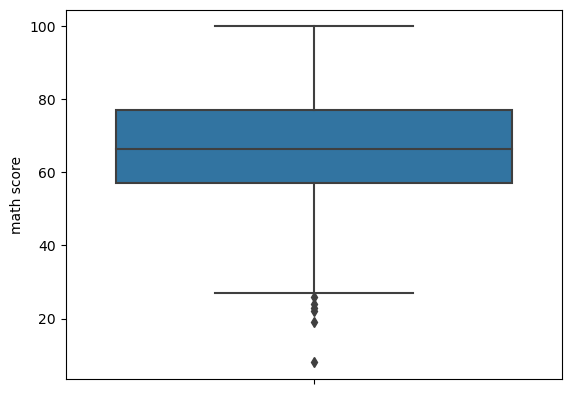

In [49]:
sns.boxplot(y=df['math score'])

In [50]:
df2=df
df2['math score'].isnull().sum()
df2['math score'] = np.log(df2['math score'])
df2['math score']
#performed log transformation to convert non linear to linear, to decrease the skewness

0      4.276666
1      4.234107
2      4.499810
3      4.194341
4      4.330733
         ...   
995    4.477337
996    4.127134
997    4.077537
998    4.219508
999    4.343805
Name: math score, Length: 1000, dtype: float64

In [55]:
from scipy.stats import skew
skewness = df2.skew()
skewness


C:\Users\sahil\AppData\Local\Temp\ipykernel_7420\3342145766.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df2.skew()


math score      -1.436167
reading score   -0.270569
writing score   -0.286371
dtype: float64